In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from itertools import product

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
def load_data():
    df = pd.read_csv('data/201901-202003.csv')
    
    return df

In [3]:
def create_year(col):
    col = str(col)
    return int(col[:4])

def create_month(col):
    col = str(col)
    return int(col[4:])

In [4]:
def clean_dataframe(df):
    df['year'] = df['REG_YYMM'].apply(lambda x: create_year(x))
    df['month'] = df['REG_YYMM'].apply(lambda x: create_month(x))
    df = df.drop(['REG_YYMM'], axis=1)
    
    return df

**Data Understanding**

In [5]:
df = clean_dataframe(load_data())

In [6]:
df.shape

(24697792, 13)

In [7]:
# Duplicated data
df[df.duplicated()]

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month


In [8]:
# Nuber of null data
df.isnull().sum()

CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
year                 0
month                0
dtype: int64

In [34]:
def plot_distribution(df):
    plt.rcParams['axes.unicode_minus'] = False
    f_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family=font_name)
    
    cols = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'AGE', 'FLC']
    indices = []
    counts = []
    
    for col in cols:
        indices.append(df[col].value_counts().index)
        counts.append(df[col].value_counts().values)
        
    plt.figure(figsize=(20, 40))
    plt.subplot(2, 2, 1)
    plt.bar(indices[0], counts[0])
    plt.subplot(2, 2, 2)
    plt.bar(indices[1], counts[1])
    plt.xticks(rotation='vertical')
    plt.subplot(2, 2, 3)
    plt.bar(indices[2], counts[2])
    plt.subplot(2, 2, 4)
    plt.bar(indices[3], counts[3])
    plt.show()

**Prepare Data**

In [10]:
def prepare_data(df):
    cols = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD',
            'FLC', 'year', 'month']
    df = df.groupby(cols).sum().reset_index(drop=False)
    
    return df

In [11]:
def encode_label(df):
    dtypes = df.dtypes
    label_encoders = {}
    
    for column in df.columns:
        if str(dtypes[column]) == 'object':
            encoder = LabelEncoder()
            encoder.fit(df[column])
            label_encoders[column] = encoder
    
    for column in label_encoders.keys():
        encoder = label_encoders[column]
        df[column] = encoder.transform(df[column])
        
    return df, label_encoders

In [12]:
def engineer_features(df):
    features = df.drop(['AMT'], axis=1)
    target = df['AMT'].apply(lambda x: np.log(x))
    return features, target

**Modeling & Evaluation**

In [13]:
def plot_flc_graph(df):
    flc_sum_amt = df.groupby('FLC').sum()['AMT']

    print(flc_sum_amt)
    plt.bar(flc_sum_amt.index, np.log10(flc_sum_amt.values))
    plt.show;

In [29]:
def plot_clss_graph(df):
    clss_sum_amt = df.groupby('STD_CLSS_NM').sum()['AMT'] \
                     .sort_values(ascending=False)

    print(clss_sum_amt)
    plt.figure(figsize=(20,10))
    plt.bar(clss_sum_amt.index, np.log10(clss_sum_amt.values))
    plt.xticks(rotation='vertical')
    plt.show;

In [15]:
def plot_month_graph(df):
    month_median_amt = df.groupby('month').median()['AMT']
    
    print(month_median_amt)
    plt.bar(month_median_amt.index, np.log10(month_median_amt.values))
    plt.xticks(month_median_amt.index)
    plt.show;

In [16]:
def split_model_evaluate(features, target):
    # Split
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size =0.33, random_state=8)
    
    # Model
    model = RandomForestRegressor(random_state=0)
    model.fit(x_train, y_train)
    
    # Evaluate
    y_pred = model.predict(x_test)
    print('Calculated MSE is {}'.format(mean_squared_error(y_test, y_pred)))
    
    r2 = model.score(x_test, y_test)
    print('Calculated R^2 is {}'.format(r2))
    
    return model

In [ ]:
def plot_feature_importance(features, model):
    plt.bar(features.columns, model.feature_importances_)
    plt.xticks(rotation='vertical')
    plt.show;
    print(model.feature_importances_)

In [48]:
def save_model(model, filepath):
    joblib.dump(model, filepath)
    
    print("{} is saved.".format(model)) 

**Code execution**

In [17]:
df = clean_dataframe(load_data())

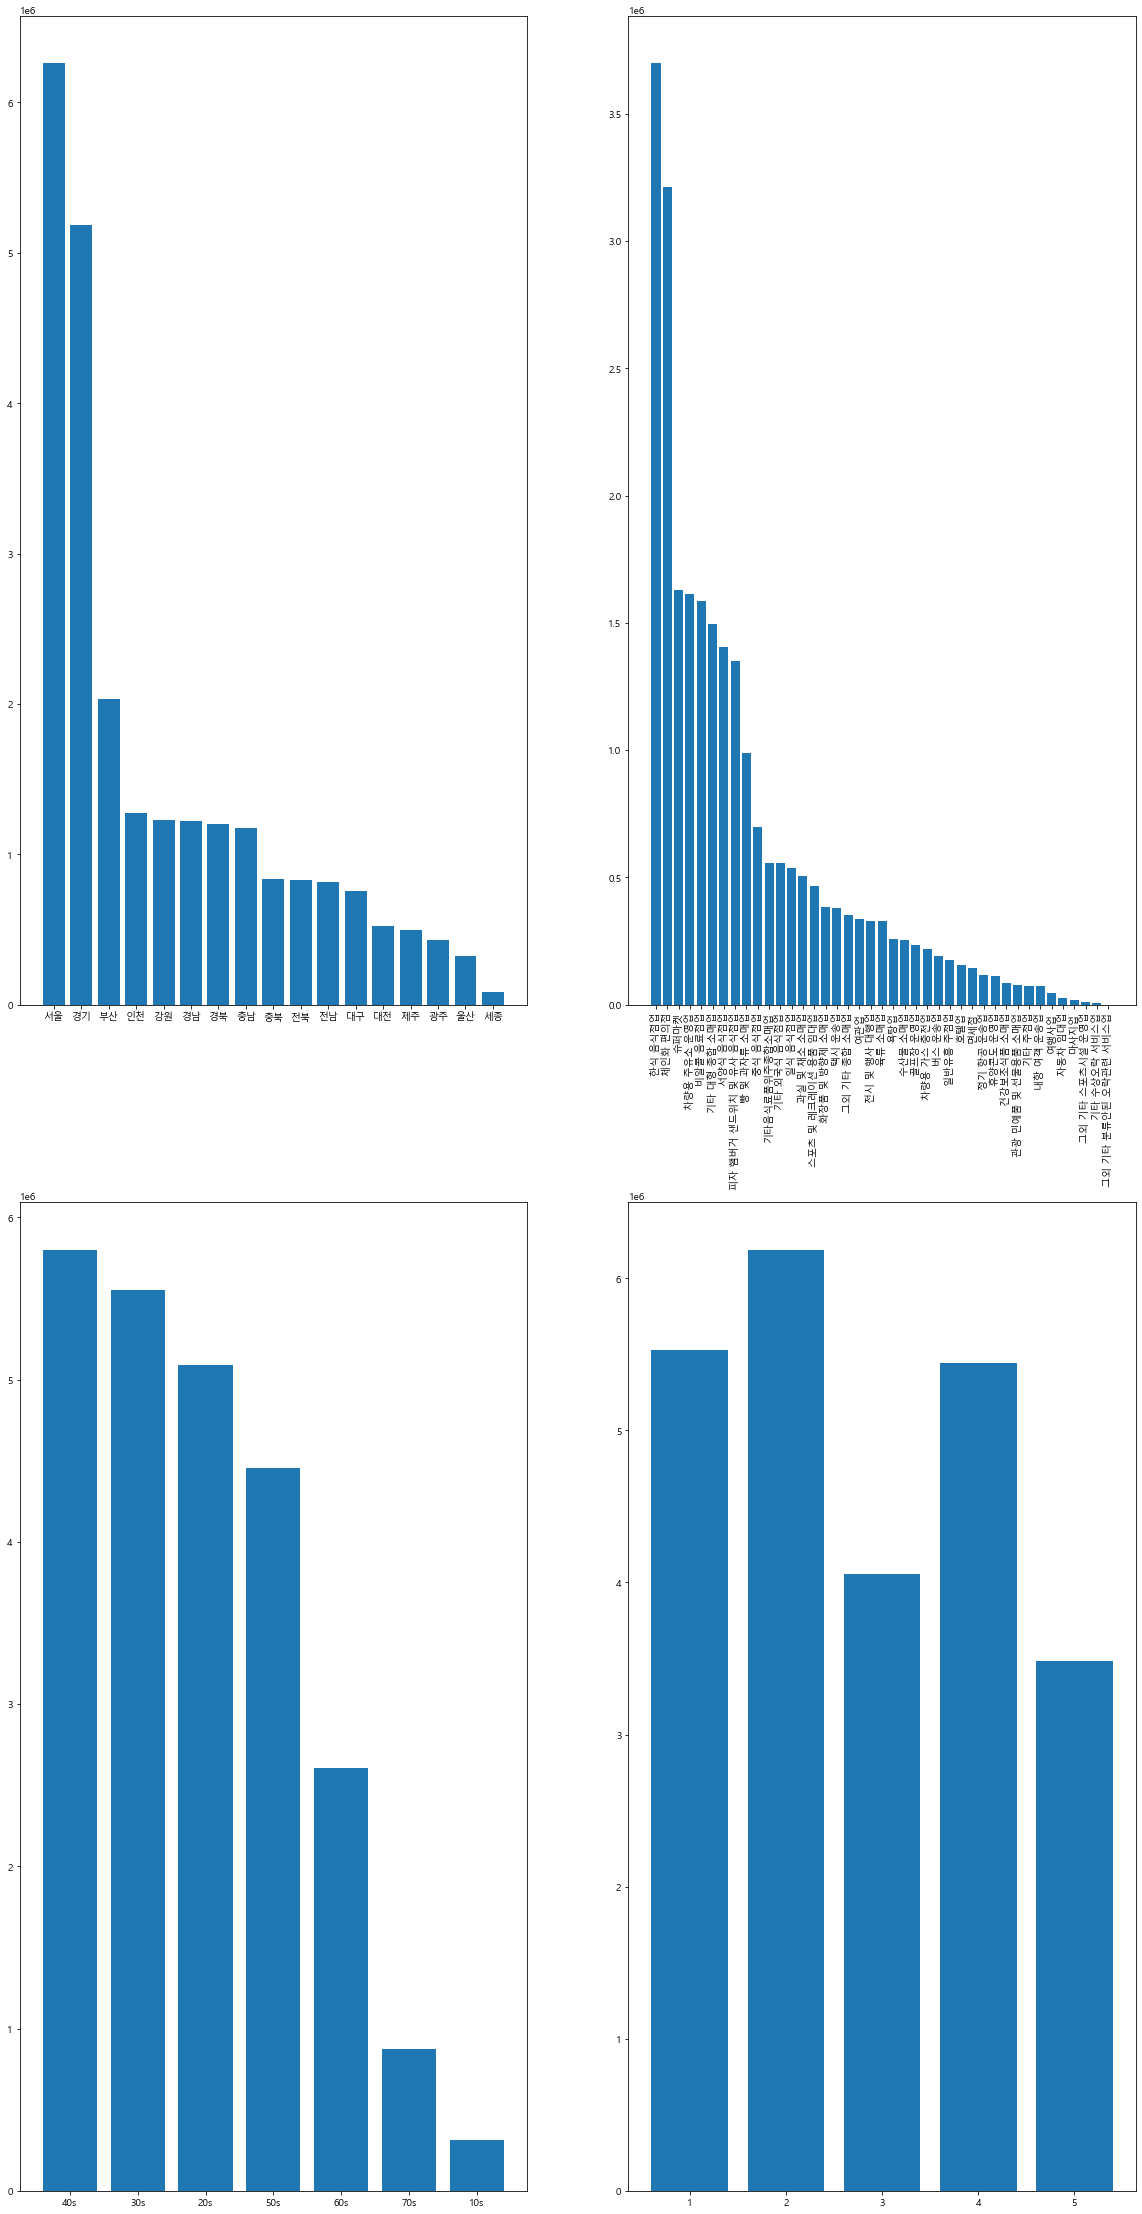

In [35]:
plot_distribution(df)

FLC
1     7371507278072
2    12619055902225
3    11538603588734
4    17864707502682
5    10902152777293
Name: AMT, dtype: int64


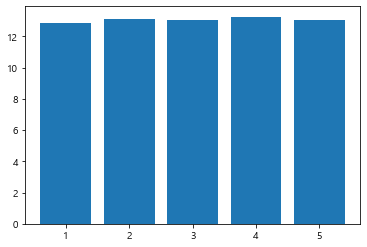

In [25]:
plot_flc_graph(df)

STD_CLSS_NM
한식 음식점업                  13737489719551
차량용 주유소 운영업               7708652073883
기타 대형 종합 소매업              7328854819388
슈퍼마켓                      6730329364274
체인화 편의점                   5303958703193
서양식 음식점업                  1748358904526
택시 운송업                    1733409541974
기타음식료품위주종합소매업             1569246626978
스포츠 및 레크레이션 용품 임대업        1245725426753
육류 소매업                    1166039087386
비알콜 음료점업                  1143497863742
피자 햄버거 샌드위치 및 유사 음식점업     1100581283937
그외 기타 종합 소매업              1025691118171
중식 음식점업                    952361423580
빵 및 과자류 소매업                893591674917
일식 음식점업                    792341708115
화장품 및 방향제 소매업              639380260823
기타 외국식 음식점업                623167678948
과실 및 채소 소매업                618928801283
골프장 운영업                    595701968828
정기 항공 운송업                  581098689779
일반유흥 주점업                   541315173187
면세점                        404512192532
수산물 소매업                    297031773253
여관업                        2

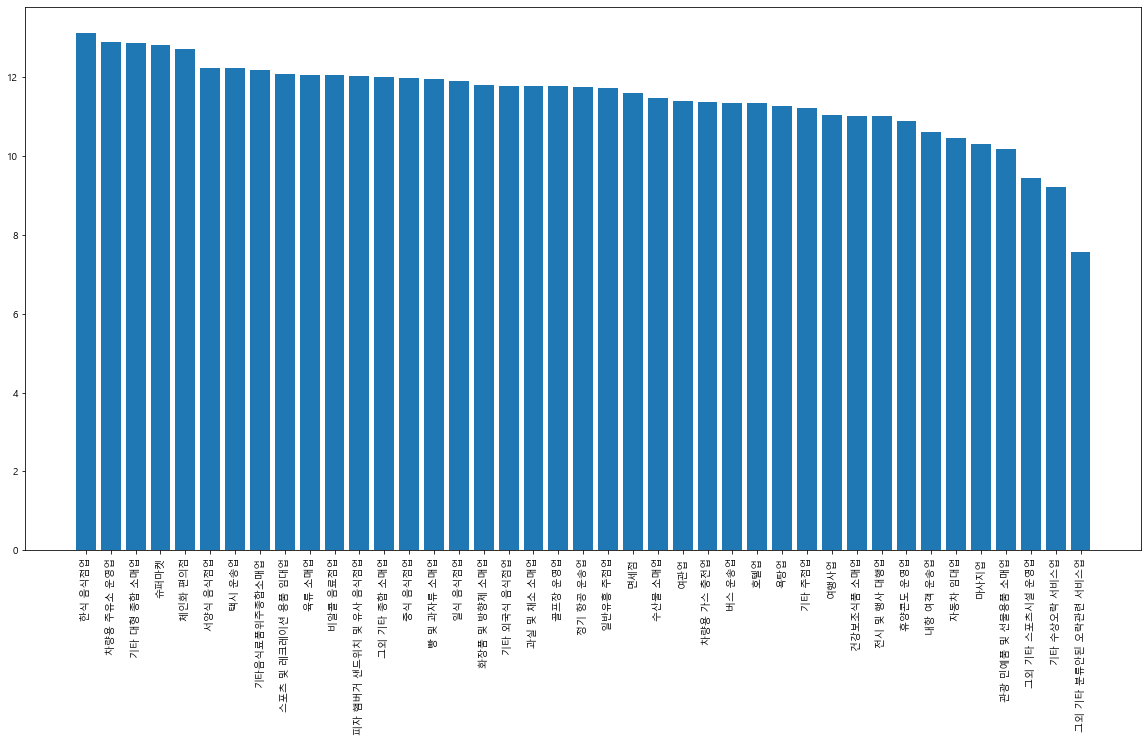

In [31]:
plot_clss_graph(df)

month
1     256730
2     250520
3     265000
4     250970
5     250700
6     248000
7     249900
8     243000
9     247570
10    248500
11    252350
12    261000
Name: AMT, dtype: int64


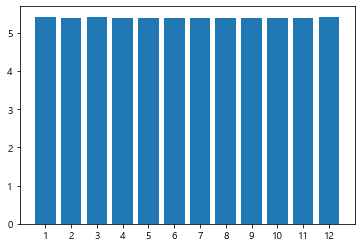

In [27]:
plot_month_graph(df)

In [36]:
df, label_encoders = encode_label(prepare_data(df))

In [37]:
features, target = engineer_features(df)

In [38]:
model = split_model_evaluate(features, target)

Calculated MSE is 0.17707733868485037
Calculated R^2 is 0.971805407037135


[0.012345   0.0835656  0.00745074 0.01008213 0.00190037 0.0034748
 0.00097954 0.00581701 0.8521467  0.02223812]


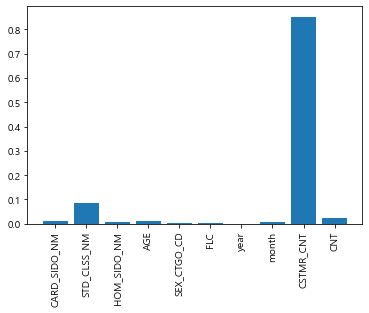

In [70]:
plot_feature_importance(features, model)

In [49]:
save_model(model, "model.pkl")

RandomForestRegressor(random_state=0) is saved.
